In [15]:
# Pytorch for Deep Learning and Machine Learning 01
import torch
import matplotlib.pyplot as plt
from torch import nn


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# In this module we will work on the ML pipe line
"""
Workflow Fundamentals!
1. Get data ready
2. Build or pick a pretrained model 
    pick a loss function/optimizer
    build a training loop
3. Fit the model to the data
4. Evaluate
5. Improve through experimentation
6. Save and reload trained models
"""

what_were_covering = {
    1: "Data Prep",
    2: "Build a model",
    3: "Fit the model",
    4: "Make preds and evals (inference)",
    5: "Save and load",
    6: "Put it together"
}

# We gotta combine all these pytorch building blocks in nn to build a Neural Network Model


## Data loading!!!
# Data can be almost anything - excel, images, videos, audio, text, ...

# ML is a game of two parts 
# - get data into a numerical representation
# - build a model to learn patterns in that numerical representation

# NLP encodes text into tokens

w = 0.7
b = 0.3


start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1) # Needed to add an extra dimension for some reason, has something to do with how the NN model processes tensors
y = w * X + b

# Train/test/eval data split
# train - 60-80%
# test - 10 - 20%
# eval - 10 -20%
# Scikit learn has excellent train_test_split data functions, adds randomness


train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# Data visualization

def plot_predictions(
        train_data=X_train,
        train_labels=y_train, 
        test_data=X_test,
        test_labels=y_test,
        predictions=None):
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data,predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size":14})





In [16]:
device

device(type='cuda')

# Creat a linear regression model class
To begin making a ML neural network, we will create a class as a framework

What the model does:
* Start with random vlaues (weights and bias)
* Look at training data and adjust the random values to better represent the iedal values.

It does this by two main algorithms:
1. Gradient Decent
2. Backpropogation



In [17]:
class LinearRegressionModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1,requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias # This is the linear regression formula
    
    
        


### PyTorch Building Blocks
* torch.nn - contains all of the buiilding blocks for computation graphs
* torch.nn.Parameter - What parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - This is where the optimizers in PyTorch live. Critical for optimizing the weights and bias.
* def forward() - All nn.Module subclasses require you to overwrite forward. This method defines what happens in the forward computation.
* torch.utils.data.Dataset - Represents a map between key and sample pairs of your data
* torch.utils.data.Dataloader - Creates a python iterable over a torch Dataset. Allows you to iterate over your data.


### Step One - Data
------------
- torchvision.transforms
- torch.utils.data.Dataset
- torch.utils.data.DataLoader

### Step Two - Models
---------------
- torch.nn
- torch.nn.Module
- torchvision.models
- torch.optim

### Step Three - Fitting
---------------

### Step Four - Eval
---------------
- torchmetrics

### Step Five - Experimentation
--------------------
- torch.utils.tensorboard

In [18]:
# Let's look inside our model! start by creating a random seed
torch.manual_seed(2697)

model = LinearRegressionModel()

model.parameters()

for parameter in list(model.parameters()):
    print(parameter)

Parameter containing:
tensor([0.0739], requires_grad=True)
Parameter containing:
tensor([-1.4870], requires_grad=True)


In [19]:
model.state_dict()["bias"]

tensor([-1.4870])

### Making prediction using `torch.inference_mode()`




In [20]:
# Make preds with model
with torch.inference_mode():
    y_preds = model(X_test)

y_test, y_preds

(tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]),
 tensor([[-1.4279],
         [-1.4264],
         [-1.4250],
         [-1.4235],
         [-1.4220],
         [-1.4205],
         [-1.4191],
         [-1.4176],
         [-1.4161],
         [-1.4146]]))

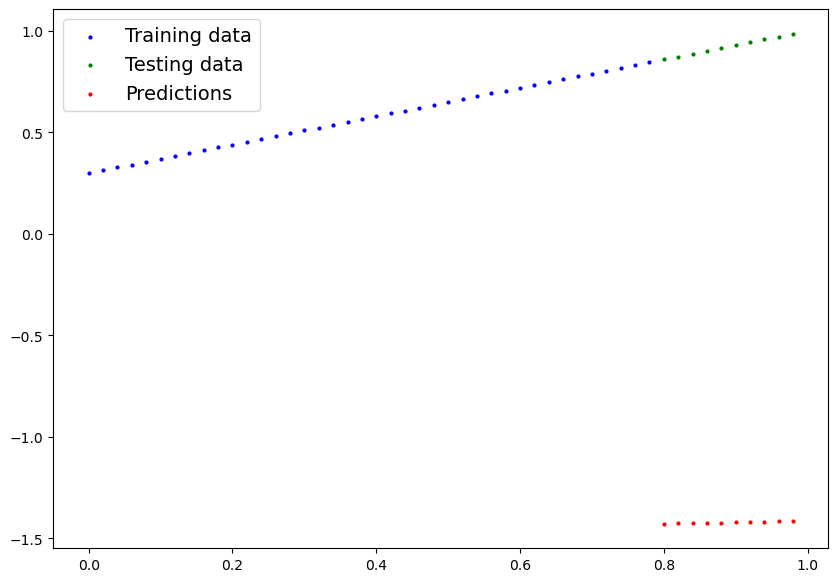

In [21]:
plot_predictions(predictions=y_preds)

### Train Model
One way to measure how poor or strong the models preds are is to use a loss funciton.

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is beter

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters
    * params - the model parameters you would like to optimize
    * learning rate - hyperparameter that dictates the size of steps the optimizer takes to try to optimize the model parameters

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [22]:
# Set up a loss function
loss_fn = nn.L1Loss()

# Set up an optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=1e-3) # params are essentially the weights and bias of the model

### Create a Training and Testing Loop!

#### What we need:
------------
0. Loop through the data
1. Forward propogation - makes predictions on data
2. Calculate the loss between preds and true values\
3. Optimizer zero grad
4. Loss backwards - move backwards through network, calculating the gradients of each of the params of the model with respect to the loss
5. Optimizer step - uses optimizer to adjust the parameters to try to lower the loss.


Epoch: 0 | Loss: 2.0312113761901855 | Test loss: 2.3429207801818848
Epoch: 10 | Loss: 2.0196900367736816 | Test loss: 2.32944917678833
Epoch: 20 | Loss: 2.0081682205200195 | Test loss: 2.3159775733947754
Epoch: 30 | Loss: 1.9966471195220947 | Test loss: 2.3025062084198
Epoch: 40 | Loss: 1.9851255416870117 | Test loss: 2.289034605026245
Epoch: 50 | Loss: 1.9736039638519287 | Test loss: 2.2755634784698486
Epoch: 60 | Loss: 1.9620826244354248 | Test loss: 2.262091875076294
Epoch: 70 | Loss: 1.9505609273910522 | Test loss: 2.2486202716827393
Epoch: 80 | Loss: 1.9390398263931274 | Test loss: 2.2351489067077637
Epoch: 90 | Loss: 1.9275181293487549 | Test loss: 2.221677303314209
Epoch: 100 | Loss: 1.9159965515136719 | Test loss: 2.2082056999206543
Epoch: 110 | Loss: 1.904475212097168 | Test loss: 2.194734573364258
Epoch: 120 | Loss: 1.892953634262085 | Test loss: 2.181262969970703
Epoch: 130 | Loss: 1.881432294845581 | Test loss: 2.1677913665771484
Epoch: 140 | Loss: 1.8699108362197876 | Test

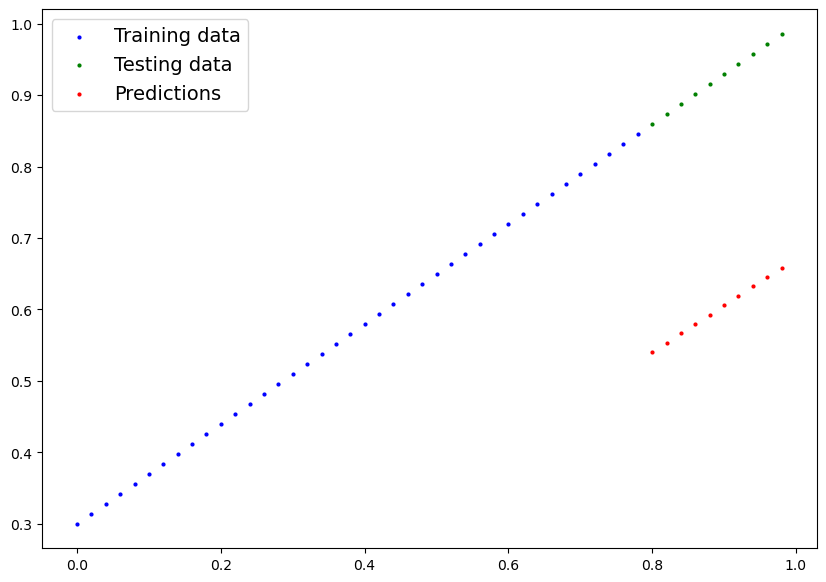

In [23]:
# An epoch is one loop through the data

epochs = 1500

# Track different values, good for evaluating different experiments
epoch_count = []
loss_val = []
test_loss_val = []

# Step 0
for epoch in range(epochs):
    # Set the model to training mode
    model.train() # Sets all params that require gradients to require gradients!

    # Step 1 - this calls forward(), you don't need to call it explicitly
    y_pred = model(X_train)

    # Step 2
    loss = loss_fn(y_pred, y_train)

    # Step 3
    optimizer.zero_grad()

    # Step 4
    loss.backward()

    # Step 5
    optimizer.step()

    model.eval()

    with torch.inference_mode():
    # Step 1 - forward pass
        y_preds_new = model(X_test)

    # Step 2 - calculate loss
        test_loss = loss_fn(y_preds_new, y_test)
        
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_val.append(loss)
        test_loss_val.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

plot_predictions(predictions=y_preds_new)

In [24]:
model.state_dict(), 

(OrderedDict([('weights', tensor([0.6589])), ('bias', tensor([0.0130]))]),)

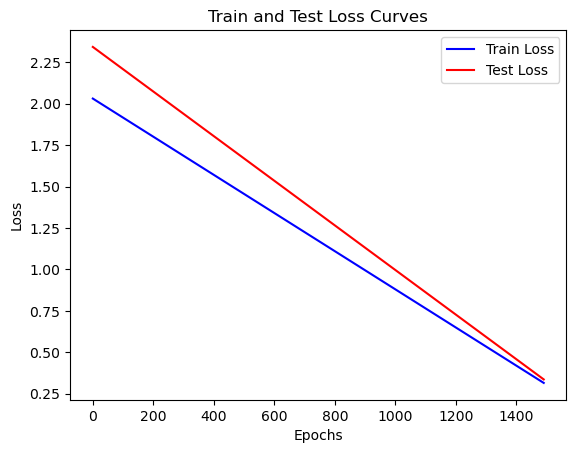

In [25]:
import numpy as np
loss_val = np.array(torch.tensor(loss_val).numpy())
test_loss_val = np.array(torch.tensor(test_loss_val).numpy())

# Plot the loss curves
plt.plot(epoch_count, loss_val, c="b", label="Train Loss")
plt.plot(epoch_count, test_loss_val, c="r", label="Test Loss")
plt.title("Train and Test Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

### Saving a model in PyTorch!

There are three main methods for saving and loading models in pytorch.

1. `torch.save()` - allows you to save a pytorch model in pickle format
2. `torch.load()` - allows you to load a saved pytorch object
3. `torch.nn.Module.load_state_dict()` - this allows you to laod a model's saved state dict

https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [26]:
print(f"model state dict: {model.state_dict()} \n optimizer state dict: {optimizer.state_dict()}")

model state dict: OrderedDict([('weights', tensor([0.6589])), ('bias', tensor([0.0130]))]) 
 optimizer state dict: {'state': {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}}, 'param_groups': [{'lr': 0.001, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 1]}]}


In [27]:
# Saving our pytorch model
from pathlib import Path

# 1. Create model directory!
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [28]:
# To load in a saved state_dict, we have to isntantiate a new instance of our modle class
loaded_model = LinearRegressionModel()

# Load the saved state_dict to the loaded_model
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6589])), ('bias', tensor([0.0130]))])

In [29]:
# Make some preds with our model
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)

loaded_model_preds

tensor([[0.5401],
        [0.5533],
        [0.5664],
        [0.5796],
        [0.5928],
        [0.6060],
        [0.6192],
        [0.6323],
        [0.6455],
        [0.6587]])

In [30]:
model.eval()
with torch.inference_mode():
    model_preds = model(X_test)

model_preds

tensor([[0.5401],
        [0.5533],
        [0.5664],
        [0.5796],
        [0.5928],
        [0.6060],
        [0.6192],
        [0.6323],
        [0.6455],
        [0.6587]])

Epoch: 0 | Loss: 0.33661434054374695 | Test Loss: 0.2875903844833374
Epoch: 500 | Loss: 0.03347616270184517 | Test Loss: 0.07768018543720245
Epoch: 1000 | Loss: 0.016291335225105286 | Test Loss: 0.038028277456760406
Epoch: 1500 | Loss: 0.000550043594557792 | Test Loss: 0.0009349643951281905


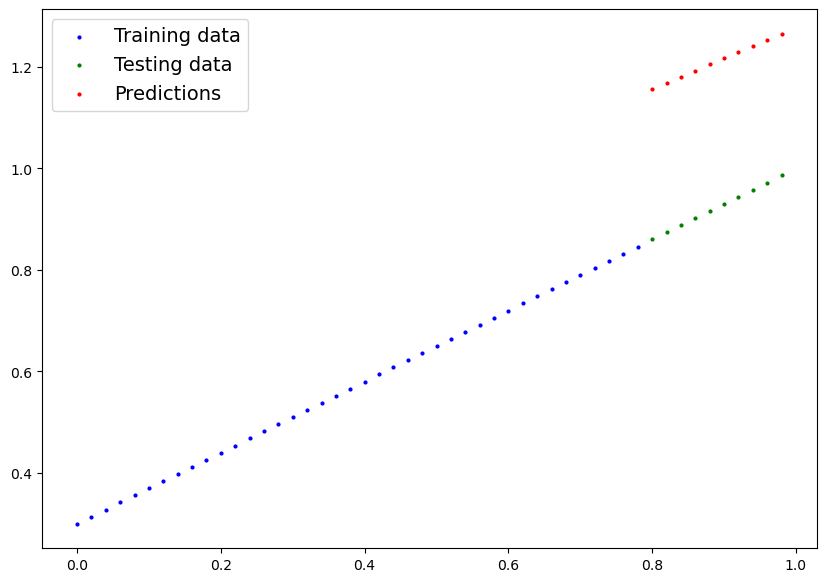

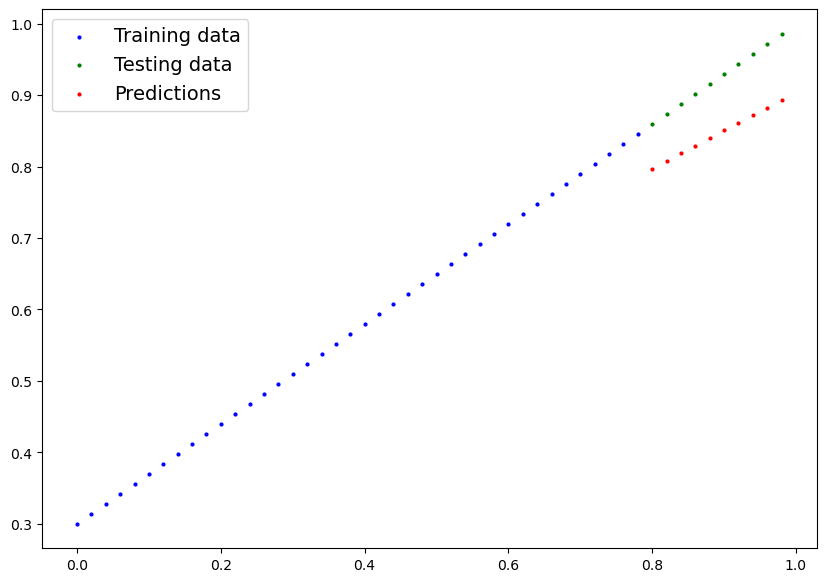

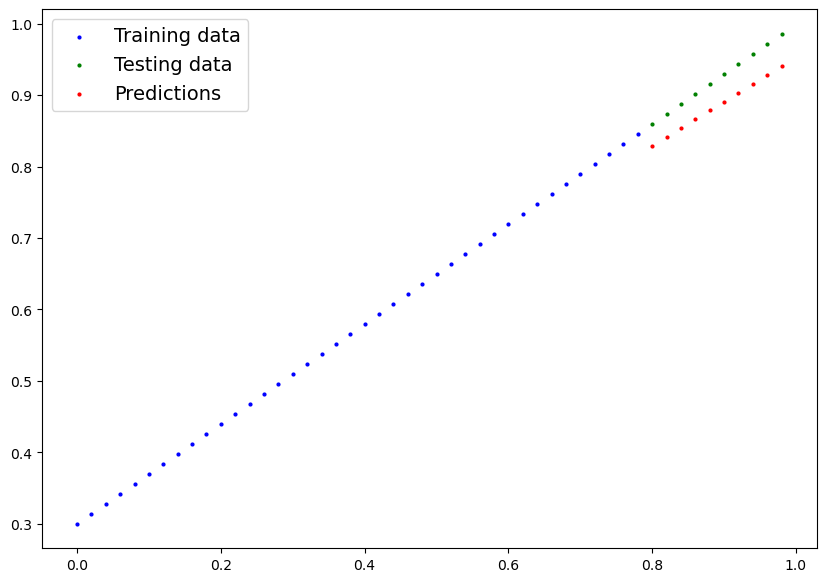

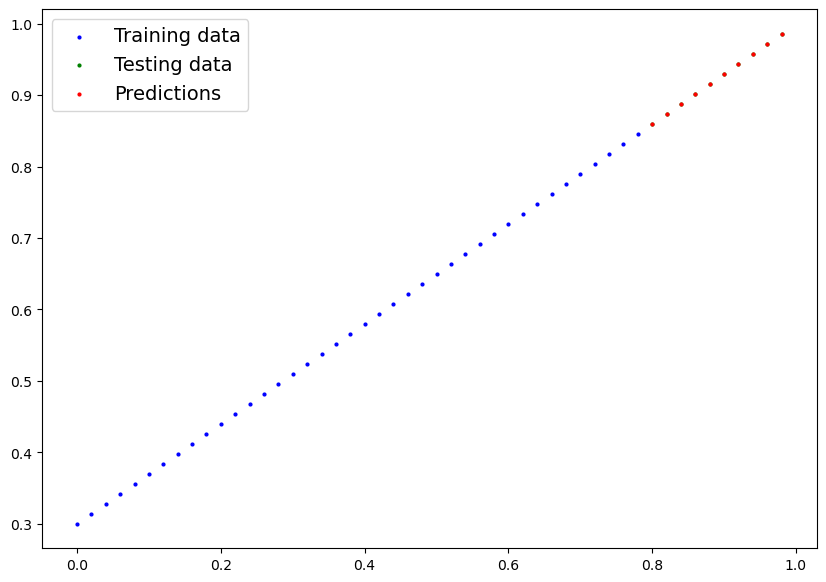

In [38]:
# Putting it all together
# Import necessary packages
import torch
import matplotlib.pyplot as plt
from torch import nn
import numpy as np

# Set seed
SEED = 5188
EPOCHS = 2000
LR = 1e-3

# Get data in order - for this it is a simple linear model

# This is the actual line we are trying to train the model to fit to
weight = 0.7
bias = 0.3

start = 0 
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# Split data into train and test
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# Build our basic little linreg model
class LinearRegModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1,requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1,requires_grad=True, dtype=torch.float))
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return x*self.weights+self.bias

# Create model
torch.manual_seed(SEED)
model = LinearRegModel()

# Create loss_fn and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=LR)

# Training loop
epochs = range(EPOCHS)

for epoch in epochs:
    model.train()
    preds = model(X_train)
    optimizer.zero_grad()
    loss = loss_fn(preds, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        model.eval()
        with torch.inference_mode():
            test_preds = model(X_test)
            test_loss = loss_fn(test_preds, y_test)
            print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
            plot_predictions(predictions=test_preds)

